# 최적화 함수 (Optimizer)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 간단한 SGD

In [3]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x ** 2

def gradient(x):
    return 2 * x

In [4]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2, 2)
    history = [w]
    
    for _ in range(epochs):
        sample = np.random.choice(data_sample)  # 랜덤하게 샘플 선택 
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
    return history

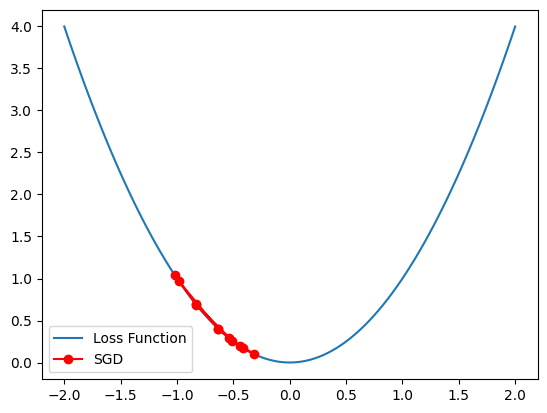

In [20]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')
plt.legend()
plt.show()

### 모멘텀 추가

In [138]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2, 2)
    v = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        v = momentum * v - lr * grad
        w += v
        
        history.append(w)

    return history

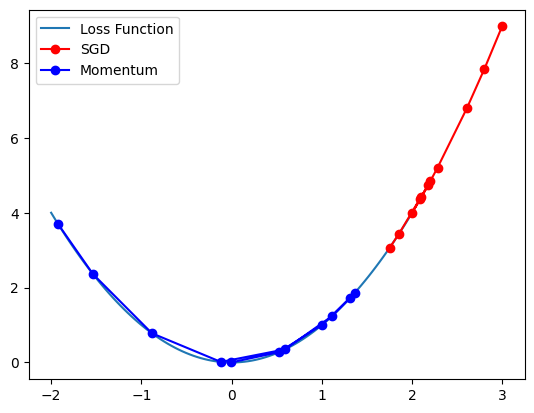

In [146]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')
plt.legend()
plt.show()

### 학습률에 따른 SGD

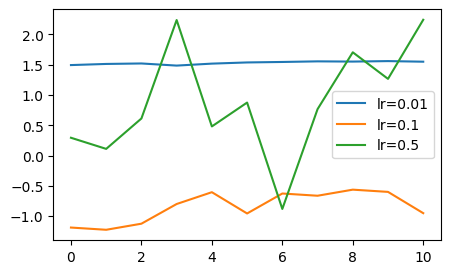

In [149]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5, 3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
plt.legend()
plt.show()

### AdaGrad

In [150]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history


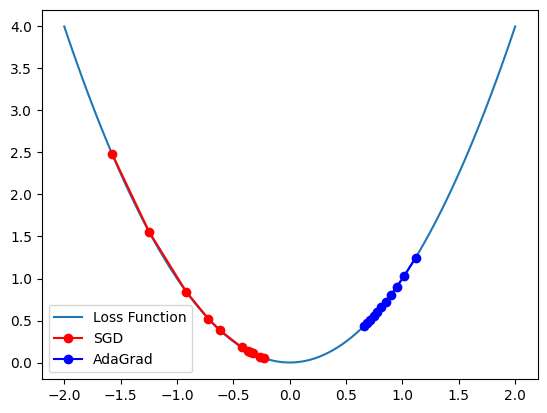

In [ ]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.legend()
plt.show()  # Adagrad는 학습이 될수록 간격이 좁아지게 되는 것을 볼 수 있다. 그러다가 학습이 거의멈추는 형태를 보여준다

### RMSprop

In [217]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h = beta * h + (1 - beta) * grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)

    return history

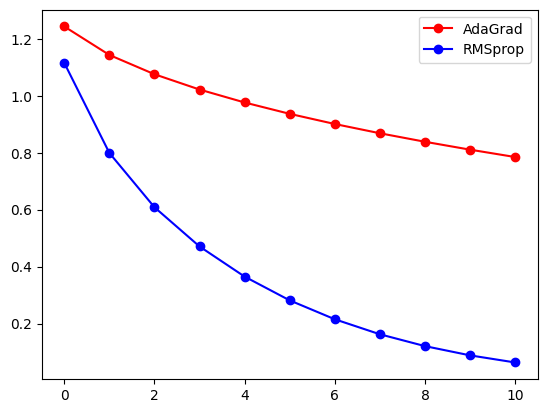

In [229]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

### Adam

In [230]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1 - beta1) * grad 
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)    # 초기 단계에서 m, v에 대해서 초기화를 해줬는데 초기화가 0으로 되어있기 때문에 0에 가깝게 편향되는 문제를 해결하기 위해서 값을 만들어준 것.
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)

    return history



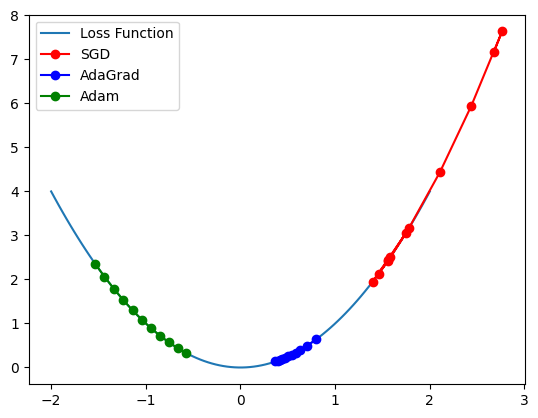

In [279]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()      # SGD는 쭉쭉쭉쭉 내려옴 / AdaGrad는 학습률을 조정하다가 멈추는 것을 볼 수 있다 / Adam은 안정적으로 학습률을 조정해 나가는 것을 볼 수 있다 


### PyTorch 활용 -> SGD vs Adam 비교

In [280]:
import torch
import torch.nn as nn
import torch.optim as optim

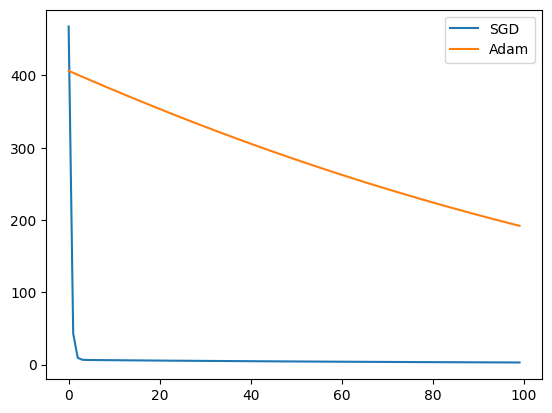

In [ ]:
torch.manual_seed(42)   # 시드 고정
X = torch.rand(100, 1) * 10
y = 3 * X + 5 + torch.randn(100, 1)

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()   # 0으로 초기화
    outputs = model_sgd(X)
    loss = criterion(outputs, y)    # 결과값과 실제값으로 손실 계산
    loss.backward() # 역전파
    optim_sgd.step()    # 모델의 파라미터 업데이트
    losses_sgd.append(loss.item())  # 현재 에폭에서의 손실값 기록

for epoch in range(epochs):
    optim_adam.zero_grad()   # 0으로 초기화
    outputs = model_adam(X)
    loss = criterion(outputs, y)    # 결과값과 실제값으로 손실 계산
    loss.backward() # 역전파
    optim_adam.step()    # 모델의 파라미터 업데이트
    losses_adam.append(loss.item())  # 현재 에폭에서의 손실값 기록

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()  # x축: epoch, y축: 손실
# Adam이 손실을 안정적으로 줄여나가는 것을 볼 수 있다. 
